In [1]:
import datetime

from baec.measurements.io.basetime import BaseTimeBucket, Credentials
from baec.measurements.measured_settlement_series import MeasuredSettlementSeries
from baec.measurements.io.zbase import measurements_from_zbase
from baec.measurements.measured_settlement_series import MeasuredSettlementSeries
from baec.model.fitcore import FitCoreModelGenerator2, FitCoreModel, FittingParameters
from baec.measurements.settlement_rod_measurement_series import SettlementRodMeasurementSeries
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

from nuclei.client import NucleiClient

from pprint import pprint


In [2]:
# Get credentials from environment variables
basetime_credentials = Credentials()
cems_nuclei_client = NucleiClient()

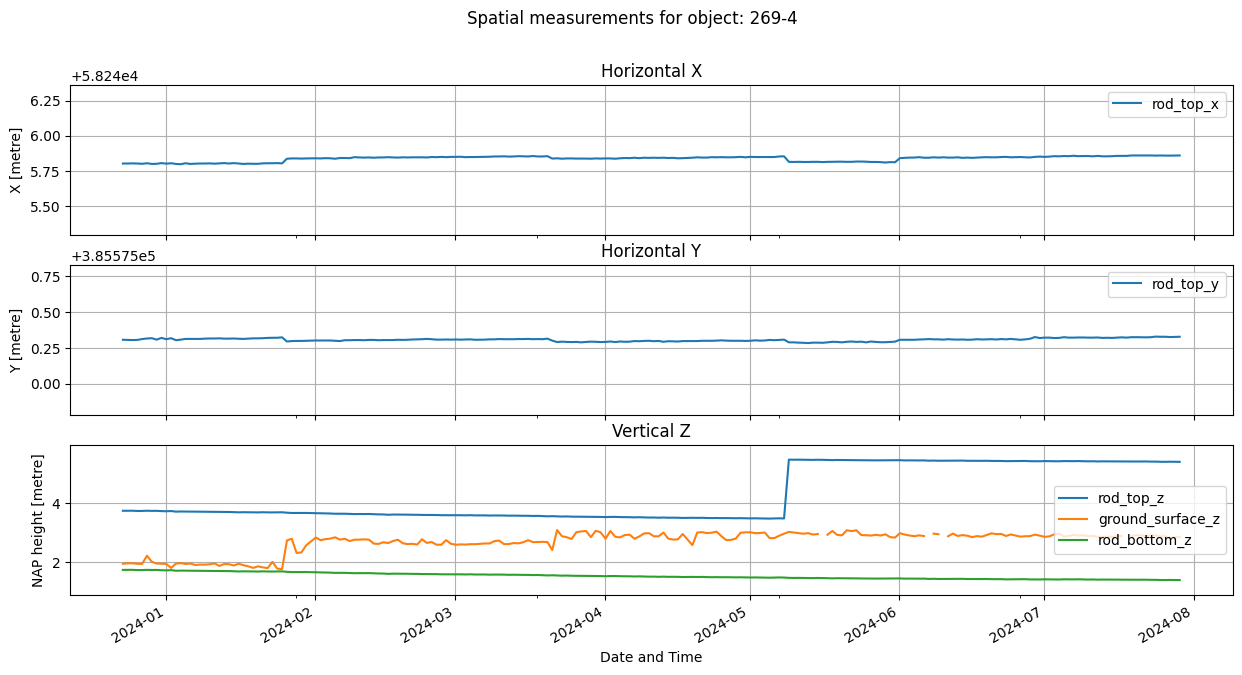

In [3]:
# Create base time bucket to request data to Basetime
basetime_bucket = BaseTimeBucket(
    credentials=basetime_credentials,
    s3bucket="baec",
)

# Request data for a given company, project and rod_id
measurement_series = basetime_bucket.make_settlement_rod_measurement_series(
    company="Demo",
    project="Hansweert",
    rod_id="269-4",
)

# Visualize the measurements
fig = measurement_series.plot_xyz_time()
fig.set_size_inches(15, 7.5)

In [4]:
from copy import deepcopy
_measurement_series = deepcopy(measurement_series)

In [5]:
# measurement_series = deepcopy(_meausrement_series)

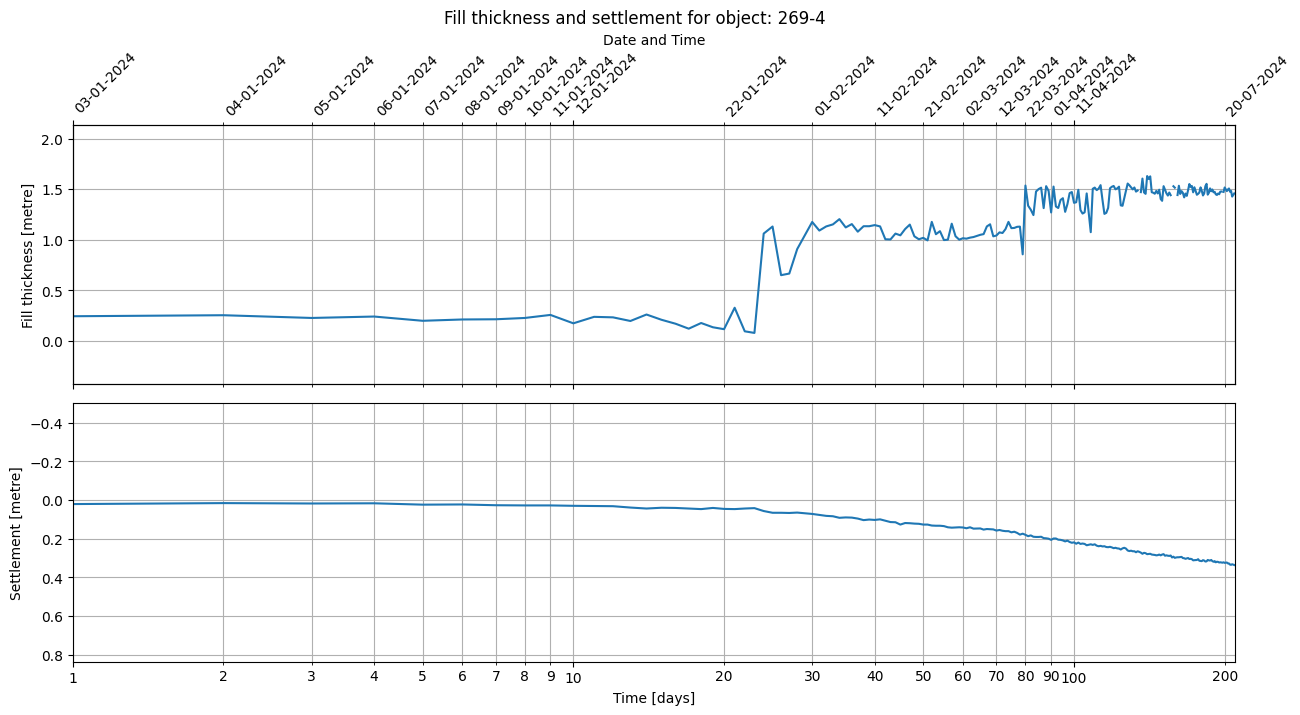

In [6]:
# Create settlement series from measurements
settlement_series = MeasuredSettlementSeries(
    series=measurement_series,
    start_date_time=datetime.datetime(2024, 1, 2),
)

# Visualize the settlements
fig = settlement_series.plot_fill_settlement_time()
fig.set_size_inches(15, 7.5)

In [136]:
measurement_series.measurements

Fit Model manually

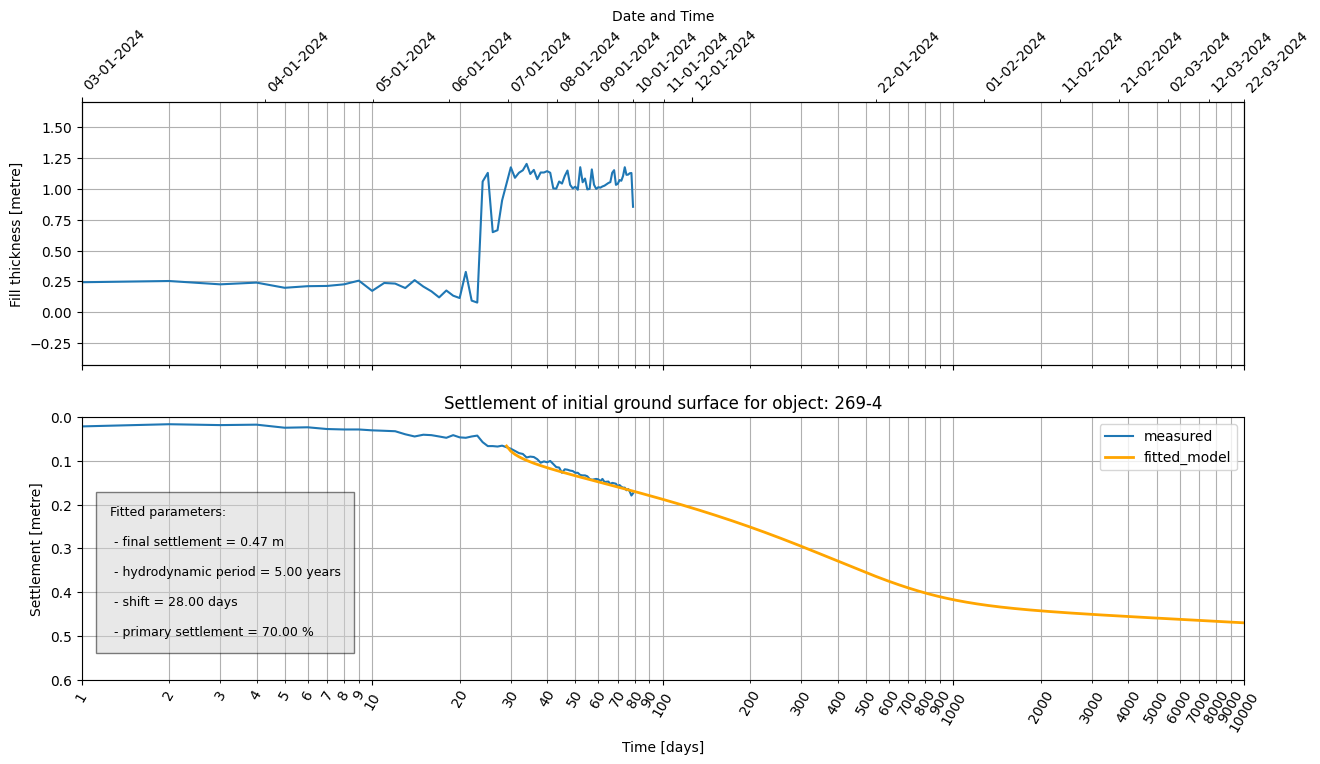

In [156]:
# Create a simple Koppejan model generator. This will be used to fit models.
import numpy as np



# 
_measurement_series = SettlementRodMeasurementSeries(measurements=measurement_series.measurements[:110])
_settlement_series =  MeasuredSettlementSeries(
    series=_measurement_series,
    start_date_time=datetime.datetime(2024, 1, 2),
)



model = FitCoreModel(
    hydrodynamicPeriod=5.0,  # years
    primarySettlement=70.0,  # %
    finalSettlement=0.47,  # m
    shift=28.0,  # days
    client=cems_nuclei_client,
)

# Predict using the fitted model
end_days = 10000.0
result = model.predict(days=np.arange(1.0, end_days - model.shift + 1.0, step=1.0))


# Plot
fig, axes = plt.subplots(2, 1, figsize=(10, 20), sharex=True)
log_time = True
min_log_time = 1.0
add_date_time = True
datetime_format: str = "%d-%m-%Y"

_settlement_series.start_date_time=datetime.datetime(2024, 1, 2)
_settlement_series.plot_fill_time(
    axes=axes[0],
    log_time=log_time,
    min_log_time=min_log_time,
    add_date_time=add_date_time,
    datetime_format=datetime_format,
)
axes[0].set_xlim(right=end_days)
axes[0].set_title("")
axes[0].set_xlabel("")



# add settlement prediction secondary axes
_settlement_series.plot_settlement_time(
    axes=axes[1],
    log_time=False,
    min_log_time=min_log_time,
    add_date_time=False,
    datetime_format=datetime_format,
)
axes[1].set_xlim(right=end_days)

# Plot measured vs. fitted model predictions
# fig = model.plot_fill_settlement_time()
fig.axes[1].plot(
    result.days + model.shift,
    result.settlement,
    color="orange",
    label="Fitted model",
    linewidth=2.0,
)
fig.axes[1].set_ylim(top=0.0, bottom=0.60)
# for ax in fig.axes:
#     ax.set_xlim(right=end_days)
label = """Fitted parameters:
    \n - final settlement = {:.2f} m
    \n - hydrodynamic period = {:.2f} years
    \n - shift = {:.2f} days
    \n - primary settlement = {:.2f} %""".format(
    model.finalSettlement,
    model.hydrodynamicPeriod,
    model.shift,
    model.primarySettlement,
)
axes[1].legend(["measured", "fitted_model"])
plt.setp( axes[1].xaxis.get_minorticklabels(), rotation=60 )
plt.setp( axes[1].xaxis.get_majorticklabels(), rotation=60 )
axes[1].get_xticks()
fig.axes[1].text(1.25, 0.5, label, bbox={"facecolor": "lightgray", "alpha": 0.5, "pad": 10.0}, fontsize=9)
fig.set_size_inches(15, 7.5)

In [ ]:
line = axes[0]._lines

In [135]:
axes[0].__dict__

{'_stale': True,
 'stale_callback': <function matplotlib.figure._stale_figure_callback(self, val)>,
 '_axes': <Axes: ylabel='Fill thickness [metre]'>,
 'figure': <Figure size 1500x750 with 3 Axes>,
 '_transform': None,
 '_transformSet': False,
 '_visible': True,
 '_animated': False,
 '_alpha': None,
 'clipbox': None,
 '_clippath': None,
 '_clipon': True,
 '_label': '',
 '_picker': None,
 '_rasterized': False,
 '_agg_filter': None,
 '_mouseover': False,
 '_callbacks': <matplotlib.cbook.CallbackRegistry at 0x7898c82ba480>,
 '_remove_method': <bound method FigureBase.delaxes of <Figure size 1500x750 with 3 Axes>>,
 '_url': None,
 '_gid': None,
 '_snap': None,
 '_sketch': None,
 '_path_effects': [],
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_in_layout': True,
 '_position': Bbox([[0.125, 0.53], [0.9, 0.88]]),
 '_originalPosition': Bbox([[0.125, 0.53], [0.9, 0.88]]),
 '_aspect': 'auto',
 '_adjustable': 'datalim',
 '_anchor': 'C',
 '_stale_viewlims': {'x': False, 'y': False},
 '_forward_naviga

In [ ]:
line._x = 

array([  0.        ,   0.        ,   1.        ,   1.        ,
         2.        ,   2.        ,   3.        ,   3.        ,
         4.        ,   4.        ,   5.        ,   5.        ,
         6.        ,   6.        ,   7.        ,   7.        ,
         8.        ,   8.        ,   9.        ,  10.        ,
        11.        ,  12.        ,  13.        ,  14.        ,
        15.        ,  16.        ,  17.        ,  18.        ,
        19.        ,  20.        ,  21.        ,  22.        ,
        23.        ,  24.        ,  25.        ,  25.        ,
        26.        ,  26.        ,  27.        ,  27.        ,
        28.        ,  30.        ,  31.        ,  32.        ,
        33.        ,  34.        ,  35.        ,  36.        ,
        37.        ,  38.        ,  39.        ,  40.        ,
        41.        ,  42.        ,  43.        ,  44.        ,
        45.        ,  46.        ,  47.        ,  48.        ,
        49.        ,  50.        ,  51.        ,  52.  

#### Fit Model

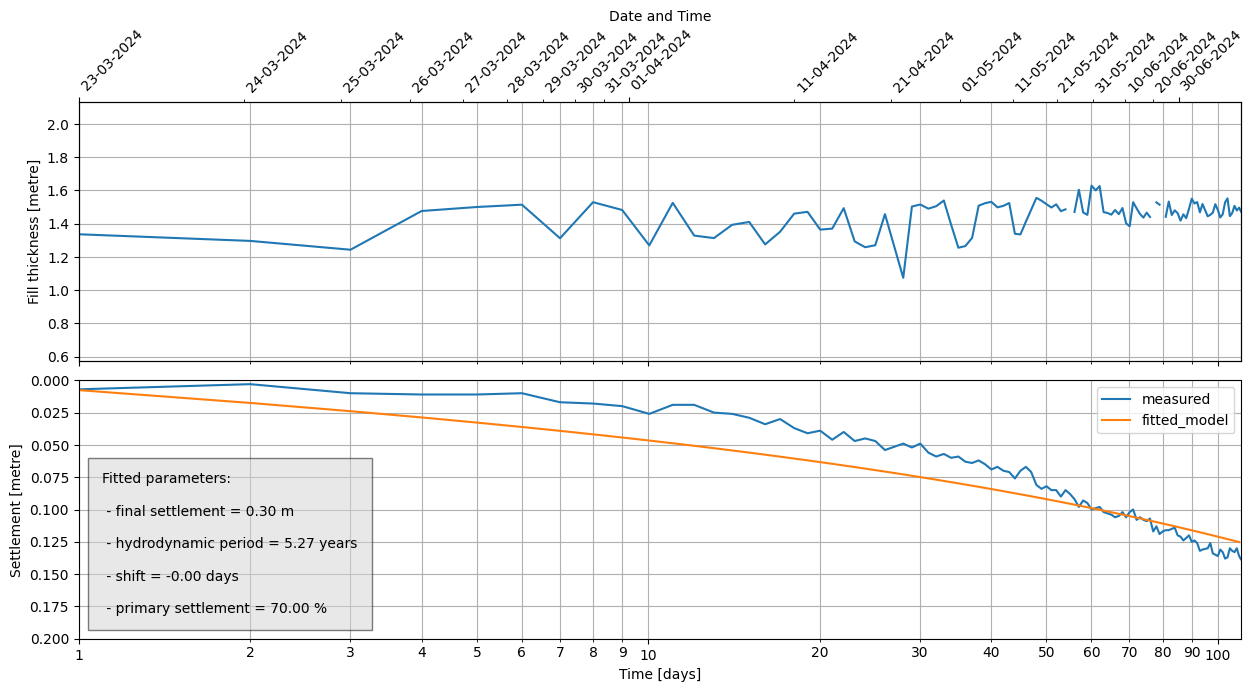

In [23]:
# Create a simple Koppejan model generator. This will be used to fit models.
base_model = FitCoreModel.default()
# base_model.primarySettlement = 99.9  # %
base_model.shift = 0.0  # days
base_model.primarySettlement = 70.0  # %
base_model.finalSettlement = 0.30  # %

model_generator = FitCoreModelGenerator2(
    base_model=base_model,
    # fitting_parameters=FittingParameters.all_free_except(["primarySettlement"]),
    fitting_parameters=FittingParameters.all_free_except(["shift", "primarySettlement", "finalSettlement"]),
    client=cems_nuclei_client,
)

# Fit the model to the settlement series
settlement_series.start_date_time = datetime.datetime(2024, 3, 22)
# settlement_series.start_date_time = datetime.datetime(2024, 4, 2)
# settlement_series.start_date_time = datetime.datetime(2024, 4, 13)
fitted_model = model_generator.fit(settlement_series)

# Predict using the fitted model
end_days = 110.0
fitted_model.predict(end_days_or_datetime=end_days)

# Plot measured vs. fitted model predictions
fig = fitted_model.plot_fill_settlement_time()
fig.axes[1].set_ylim(top=0.0, bottom=0.2)
# for ax in fig.axes:
#     ax.set_xlim(right=end_days)
label = """Fitted parameters:
    \n - final settlement = {:.2f} m
    \n - hydrodynamic period = {:.2f} years
    \n - shift = {:.2f} days
    \n - primary settlement = {:.2f} %""".format(
    fitted_model.model.finalSettlement,
    fitted_model.model.hydrodynamicPeriod,
    fitted_model.model.shift,
    fitted_model.model.primarySettlement,
)
fig.axes[1].text(1.1, 0.18, label, bbox={"facecolor": "lightgray", "alpha": 0.5, "pad": 10}, fontsize=10)
fig.set_size_inches(15, 7.5)

#### Fit Model: Animation

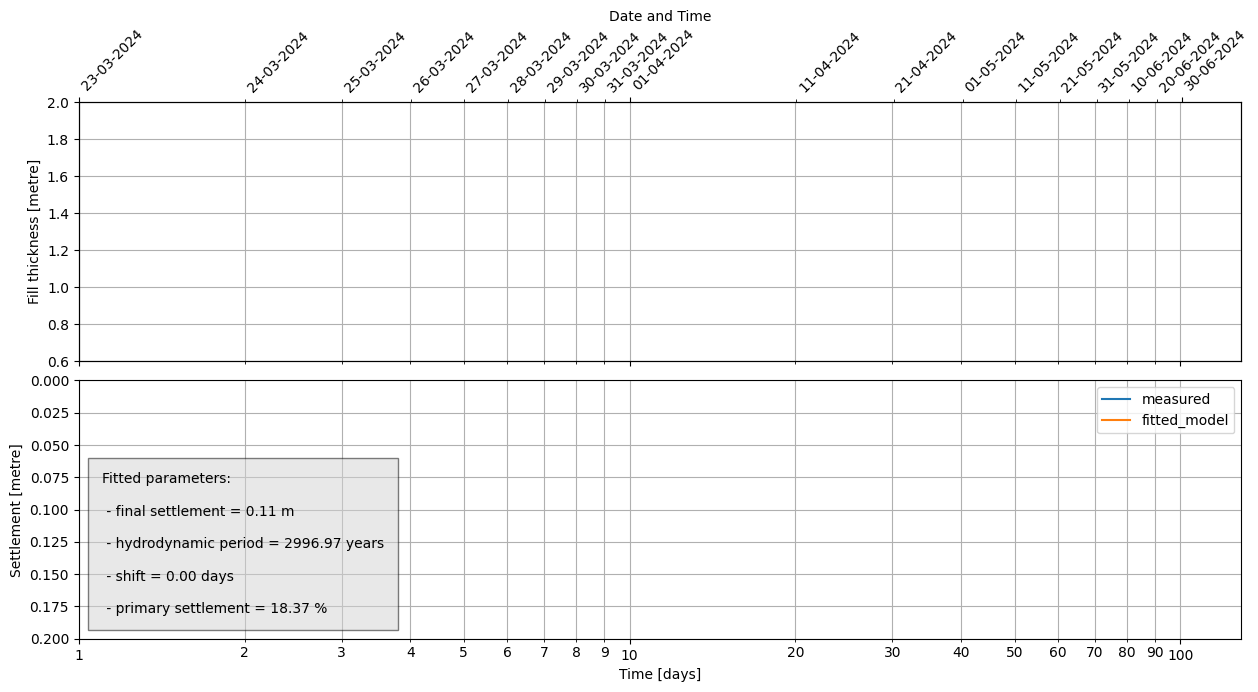

In [10]:
# Create a simple Koppejan model generator. This will be used to fit models.
base_model = FitCoreModel.default()
# base_model.primarySettlement = 99.9  # %

model_generator = FitCoreModelGenerator2(
    base_model=base_model,
    # fitting_parameters=FittingParameters.all_free_except(["primarySettlement"]),
    fitting_parameters=FittingParameters.all_free(),
    client=cems_nuclei_client,
)

# Loop making to make a fit every measurement
start_fitting_index = 110
fit_every = 1 # 10

# Make the figure for the last measuremeent
# Create settlement series from measurements
updated_settlement_series = MeasuredSettlementSeries(
    series=SettlementRodMeasurementSeries(
        measurements=measurement_series.measurements[start_fitting_index:-1]
    ),
    start_date_time=datetime.datetime(2024, 3, 22, hour=2),
)

# Fit the model to the settlement series
fitted_model = model_generator.fit(updated_settlement_series)

# Predict using the fitted model
fitted_model.predict(end_days_or_datetime=measurement_series.measurements[-1].date_time)

# Plot measured vs. fitted model predictions
fig = fitted_model.plot_fill_settlement_time()
fig.axes[0].set_ylim(top=2.0, bottom=0.6)
fig.axes[1].set_ylim(top=0.0, bottom=0.2)
fig.set_size_inches(15, 7.5)

label = """Fitted parameters:
    \n - final settlement = {:.2f} m
    \n - hydrodynamic period = {:.2f} years
    \n - shift = {:.2f} days
    \n - primary settlement = {:.2f} %""".format(
    fitted_model.model.finalSettlement,
    fitted_model.model.hydrodynamicPeriod,
    fitted_model.model.shift,
    fitted_model.model.primarySettlement,
)
fig.axes[1].text(1.1, 0.18, label, bbox={"facecolor": "lightgray", "alpha": 0.5, "pad": 10}, fontsize=10)
fig.set_size_inches(15, 7.5)

def update(i_frame):
    
    i = start_fitting_index + fit_every * (i_frame + 1)
    
    # Create settlement series from measurements
    updated_settlement_series = MeasuredSettlementSeries(
        series=SettlementRodMeasurementSeries(
            measurements=measurement_series.measurements[start_fitting_index:i+1]
        ),
        start_date_time=datetime.datetime(2024, 3, 22, hour=2),
    )

    # Fit the model to the settlement series
    fitted_model = model_generator.fit(updated_settlement_series)

    # Predict using the fitted model
    fitted_model.predict(end_days_or_datetime=measurement_series.measurements[i].date_time)

    # Update measured fill thicknesses 
    fig.axes[0].lines[0].set_xdata(updated_settlement_series.days)
    fig.axes[0].lines[0].set_ydata(updated_settlement_series.fill_thicknesses)
    
    # Update measured settlements
    fig.axes[1].lines[0].set_xdata(updated_settlement_series.days)
    fig.axes[1].lines[0].set_ydata(updated_settlement_series.settlements)
    
    # Update fitted settlements
    fig.axes[1].lines[1].set_xdata(fitted_model.predicted_settlements.days)
    fig.axes[1].lines[1].set_ydata(fitted_model.predicted_settlements.settlement)
    
    # Update fitted parameters label
    label = """Fitted parameters:
        \n - final settlement = {:.2f} m
        \n - hydrodynamic period = {:.2f} years
        \n - shift = {:.2f} days
        \n - primary settlement = {:.2f} %""".format(
        fitted_model.model.finalSettlement,
        fitted_model.model.hydrodynamicPeriod,
        fitted_model.model.shift,
        fitted_model.model.primarySettlement,
    )
    fig.axes[1].texts[0].set_text(label)

animation = FuncAnimation(fig=fig, func=update, frames=len(range(start_fitting_index + 1, len(measurement_series.measurements), fit_every)) - 1, repeat=True)

# To save the animation using Pillow as a gif
writer = PillowWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
animation.save('test.gif', writer=writer)
